In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [ ]:
emission = pd.read_csv('/content/content/MyDrive/Capstone_Project/Datasets/agri_emission.csv', encoding = 'latin-1')

In [ ]:
emission.head()

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions Totals,356,India,7234,Direct emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,27.8120,E,Estimated value,NaN
1,GT,Emissions Totals,356,India,7236,Indirect emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,6.2577,E,Estimated value,NaN
2,GT,Emissions Totals,356,India,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,34.0697,E,Estimated value,NaN
3,GT,Emissions Totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,9028.4589,E,Estimated value,NaN
4,GT,Emissions Totals,356,India,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kilotonnes,9028.4589,E,Estimated value,NaN


In [ ]:
emission.tail()

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
5410,GT,Emissions Totals,356,India,7230,Emissions (N2O),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,68.6,E,Estimated value,NaN
5411,GT,Emissions Totals,356,India,7273,Emissions (CO2),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,14200.0,E,Estimated value,NaN
5412,GT,Emissions Totals,356,India,724413,Emissions (CO2eq) from CH4 (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,1260.0,E,Estimated value,NaN
5413,GT,Emissions Totals,356,India,724313,Emissions (CO2eq) from N2O (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,18179.0,E,Estimated value,NaN
5414,GT,Emissions Totals,356,India,723113,Emissions (CO2eq) (AR5),6819,Other,2020,2020,3050,FAO TIER 1,kilotonnes,33639.0,E,Estimated value,NaN


In [ ]:
emission.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Source Code,Value,Note
count,5415.0,5415.000000,5415.000000,5415.000000,5415.000000,5415.0,5.415000e+03,0.0
mean,356.0,379862.232318,9612.474792,1999.216066,1999.216066,3050.0,3.824558e+04,NaN
std,0.0,358013.188499,14565.152744,14.770797,14.770797,0.0,1.765781e+05,NaN
min,356.0,7225.000000,5058.000000,1961.000000,1961.000000,3050.0,-2.273969e+05,NaN
25%,356.0,7230.000000,5063.000000,1992.000000,1992.000000,3050.0,2.514070e+01,NaN
50%,356.0,723113.000000,6507.000000,2001.000000,2001.000000,3050.0,6.835444e+02,NaN
75%,356.0,724313.000000,6818.000000,2011.000000,2011.000000,3050.0,1.353032e+04,NaN
max,356.0,724413.000000,69921.000000,2020.000000,2020.000000,3050.0,2.630058e+06,NaN


In [ ]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 0 to 5414
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿Domain Code    5415 non-null   object 
 1   Domain            5415 non-null   object 
 2   Area Code (M49)   5415 non-null   int64  
 3   Area              5415 non-null   object 
 4   Element Code      5415 non-null   int64  
 5   Element           5415 non-null   object 
 6   Item Code         5415 non-null   int64  
 7   Item              5415 non-null   object 
 8   Year Code         5415 non-null   int64  
 9   Year              5415 non-null   int64  
 10  Source Code       5415 non-null   int64  
 11  Source            5415 non-null   object 
 12  Unit              5415 non-null   object 
 13  Value             5415 non-null   float64
 14  Flag              5415 non-null   object 
 15  Flag Description  5415 non-null   object 
 16  Note              0 non-null      float64


In [ ]:
emission = emission.drop(['ï»¿Domain Code','Domain','Area Code (M49)','Area','Year Code','Source Code','Source','Flag','Flag Description','Note'],axis=1)

In [ ]:
emission.head()

,Element Code,Element,Item Code,Item,Year,Unit,Value
0,7234,Direct emissions (N2O),5064,Crop Residues,1961,kilotonnes,27.8120
1,7236,Indirect emissions (N2O),5064,Crop Residues,1961,kilotonnes,6.2577
2,7230,Emissions (N2O),5064,Crop Residues,1961,kilotonnes,34.0697
3,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,kilotonnes,9028.4589
4,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,kilotonnes,9028.4589


<Axes: ylabel='Element'>

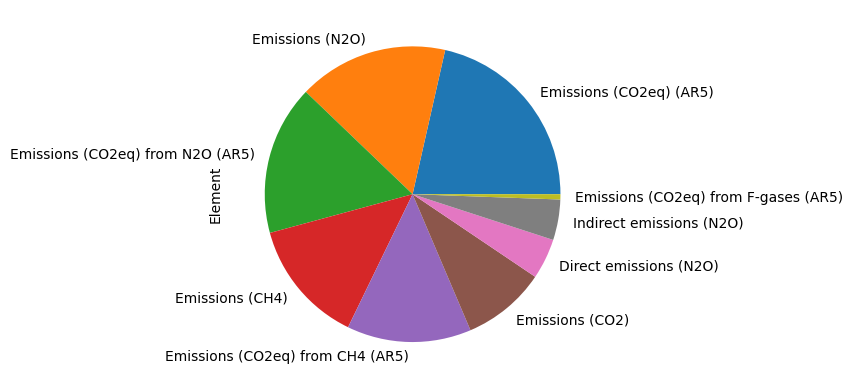

In [ ]:
emission['Element'].value_counts().plot(kind='pie')

F - gases -> Flourinated Gases are man-made gases used in a range of industrial applications.

CO2eq -> A carbon dioxide equivalent or CO2 equivalent, abbreviated as CO2-eq is a metric measure used to compare the emissions from various greenhouse gases on the basis of their global-warming potential (GWP)

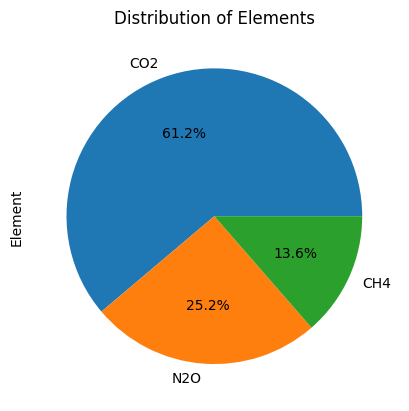

In [ ]:
# Removing the 'Indirect Emission (N2O)' Element instance inorder to reduce the dimension
emission['Element'] = emission['Element'].replace('Indirect emissions (N2O)','Direct emissions (N2O)')
emission['Element'] = emission['Element'].replace('Emissions (N2O)','N2O')
emission['Element'] = emission['Element'].replace('Direct emissions (N2O)','N2O')
emission['Element'] = emission['Element'].replace('Emissions (CO2eq) (AR5)','CO2')
emission['Element'] = emission['Element'].replace('Emissions (CO2eq) from N2O (AR5)','CO2')
emission['Element'] = emission['Element'].replace('Emissions (CO2eq) from N2O (AR5)','CO2')
emission['Element'] = emission['Element'].replace('Emissions (CO2eq) from F-gases (AR5)','CO2')
emission['Element'] = emission['Element'].replace('Emissions (CO2eq) from CH4 (AR5)','CO2')
emission['Element'] = emission['Element'].replace('Emissions (CO2)','CO2')
emission['Element'] = emission['Element'].replace('Emissions (CH4)','CH4')
# plotting a pie chart to see the Element count distribution

# Assuming 'emission' is your DataFrame
emission['Element'].value_counts().plot(kind="pie", autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Elements')

# Display the pie chart
plt.show()


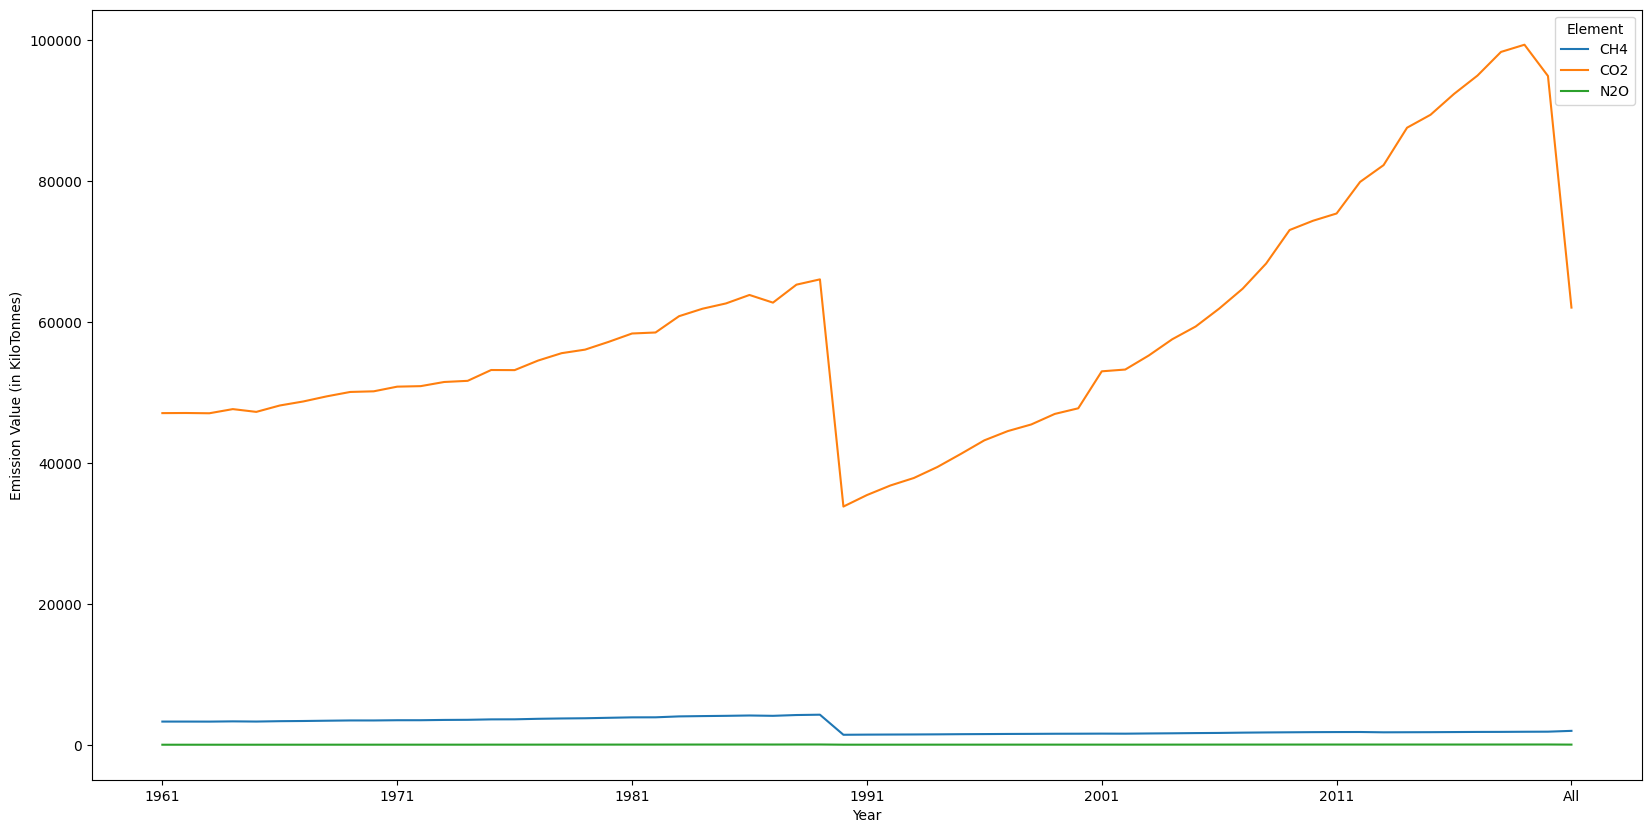

In [ ]:
temp = emission.pivot_table('Value', index='Year',columns=['Element'],margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("Year")

fig, ax = plt.subplots(figsize=(20, 10))

temp.plot(ax=ax)

# Add labels to axes
ax.set_ylabel('Emission Value (in KiloTonnes)')  # Add the appropriate unit for emission values
ax.set_xlabel('Year')

plt.show()

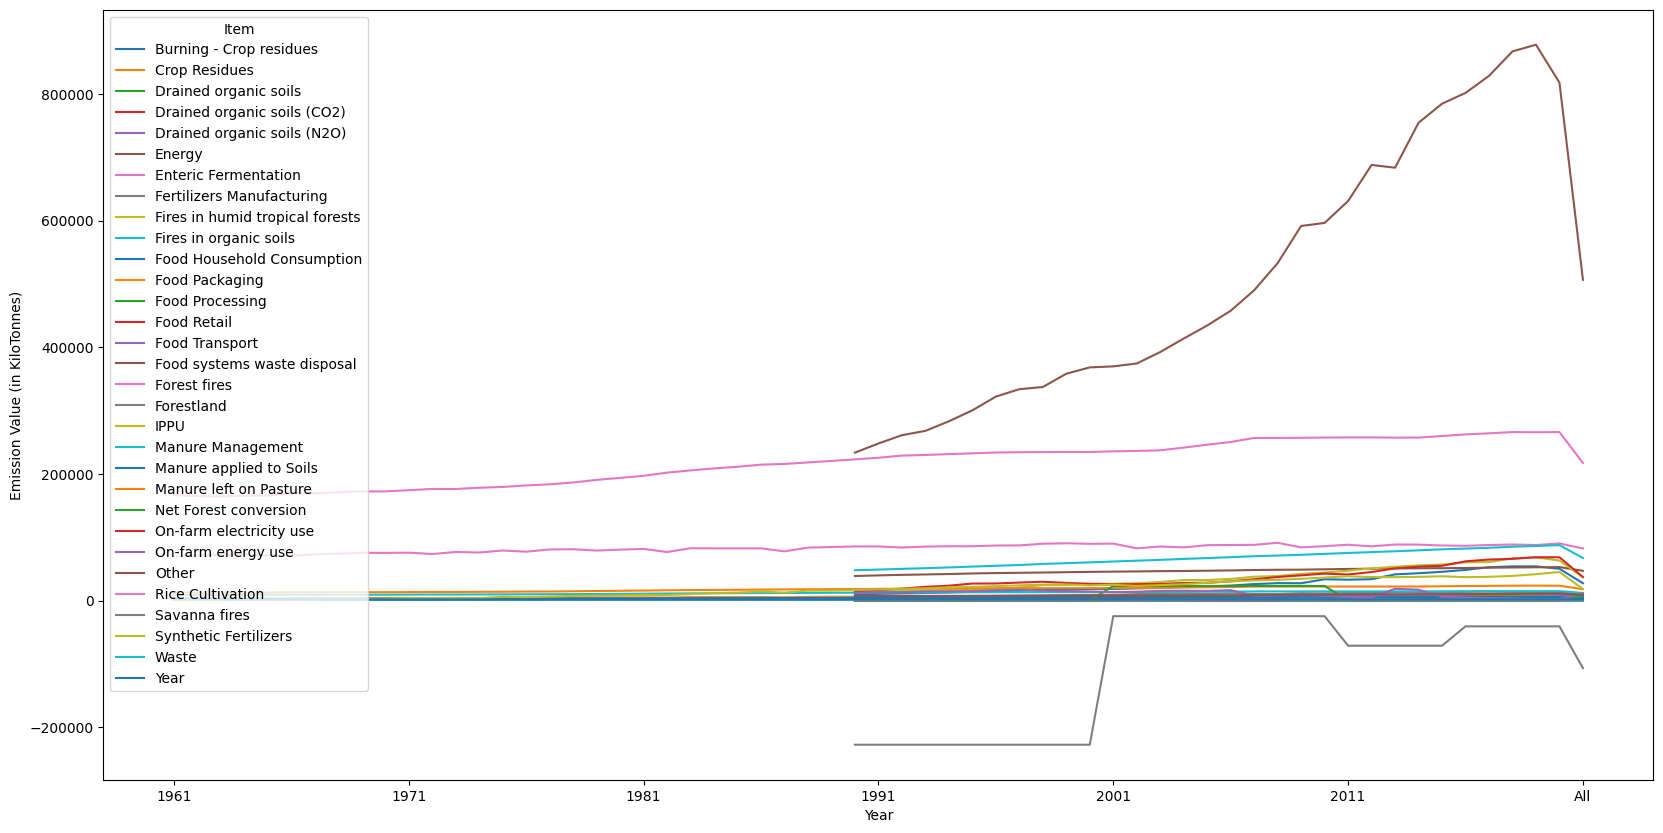

In [ ]:
temp_y = emission.pivot_table('Value', index='Year',columns=['Item'],margins=True).reset_index()
temp_y = temp_y.drop("All", axis = 1)
temp_y = temp_y.set_index("Year")

temp_y['Year'] = range(1991, len(temp_y) + 1991)

# Now proceed with plotting

fig, ax = plt.subplots(figsize=(20, 10))

temp_y.plot(ax=ax)

# Add labels to axes
ax.set_ylabel('Emission Value (in KiloTonnes)')  # Add the appropriate unit for emission values
ax.set_xlabel('Year')

plt.show()

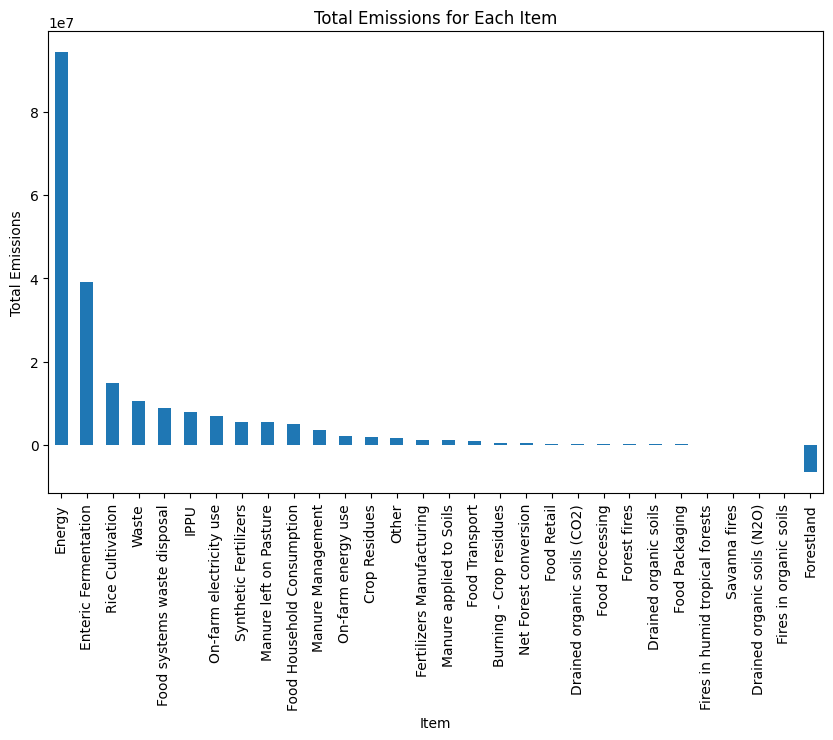

In [ ]:
# Plotting total emissions for each item
total_emissions = emission.groupby('Item')['Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
total_emissions.plot(kind='bar')
plt.title('Total Emissions for Each Item')
plt.xlabel('Item')
plt.ylabel('Total Emissions')
plt.show()

In [ ]:
emission1 = emission.pivot_table(values='Value', index=['Year'], columns=['Element'], aggfunc='sum')
emission1 = emission1.add_suffix('_Element')
emission1.head()

Element,CH4_Element,CO2_Element,N2O_Element
Year,,,
1961,13250.7240,847673.1615,388.7671
1962,13251.6809,847975.8220,389.6366
1963,13231.2195,847292.3013,391.3857
1964,13371.6457,857899.9100,401.6212
1965,13264.9678,850820.4886,397.4293


## Convert Emission Values to MegaTonnes

In [ ]:
emission1 = emission.pivot_table(values='Value', index=['Year'], columns=['Element'], aggfunc='sum')
emission1 = emission1.add_suffix('_Element')
emission1['CH4_Element']/=1000
emission1['CO2_Element']/=1000
emission1['N2O_Element']/=1000
emission1.head()

Element,CH4_Element,CO2_Element,N2O_Element
Year,,,
1961,13.250724,847.673161,0.388767
1962,13.251681,847.975822,0.389637
1963,13.231219,847.292301,0.391386
1964,13.371646,857.899910,0.401621
1965,13.264968,850.820489,0.397429


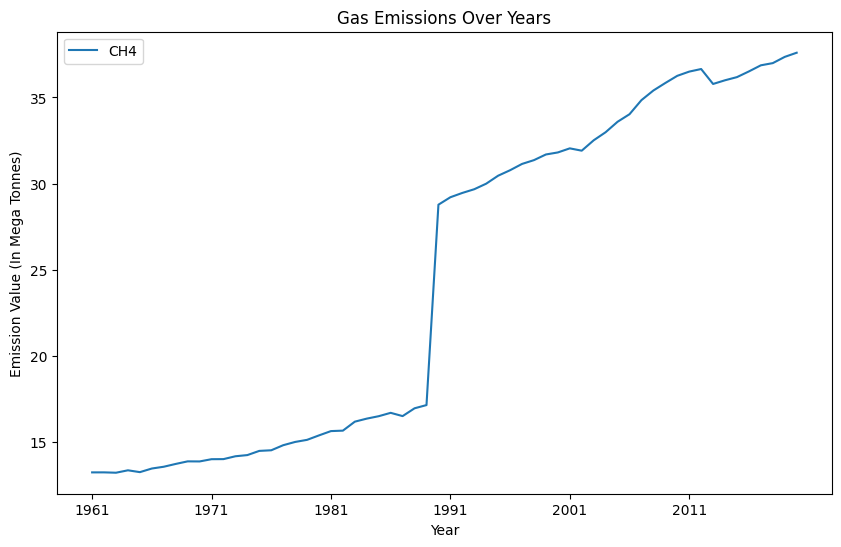

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and have 'emission1' DataFrame available

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CH4 emissions
emission1['CH4_Element'].plot(label='CH4')

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Emission Value (In Mega Tonnes)')
ax.set_title('Gas Emissions Over Years')
plt.legend()

# Set x-axis labels to display years with an interval of 10 years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(emission1.index[::10])  # Set x-ticks to every 10 years

# Show the plot
plt.show()

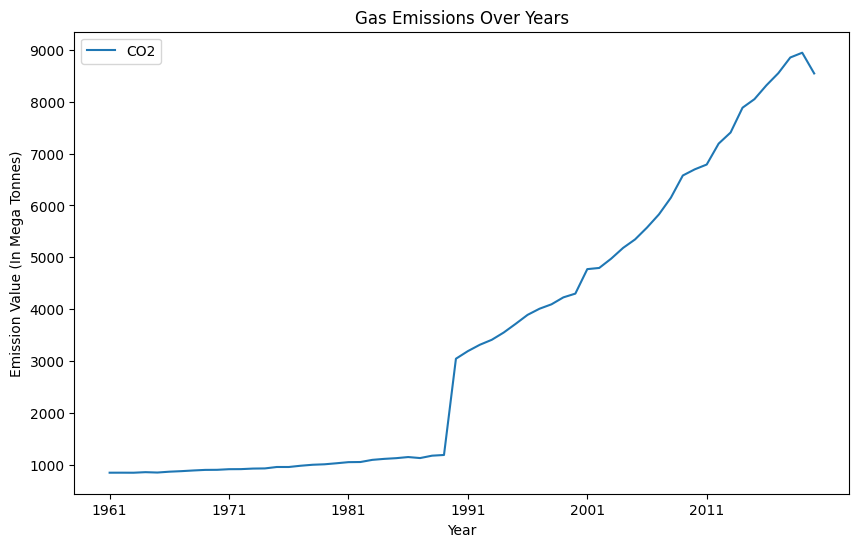

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and have 'emission1' DataFrame available

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CH4 emissions
emission1['CO2_Element'].plot(label='CO2')

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Emission Value (In Mega Tonnes)')
ax.set_title('Gas Emissions Over Years')
plt.legend()

# Set x-axis labels to display years with an interval of 10 years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(emission1.index[::10])  # Set x-ticks to every 10 years

# Show the plot
plt.show()

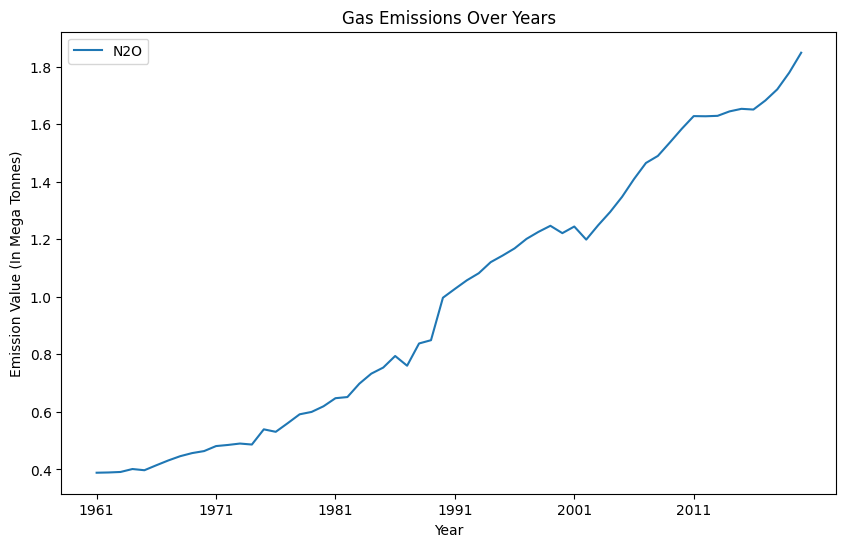

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and have 'emission1' DataFrame available

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CH4 emissions
emission1['N2O_Element'].plot(label='N2O')

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Emission Value (In Mega Tonnes)')
ax.set_title('Gas Emissions Over Years')
plt.legend()

# Set x-axis labels to display years with an interval of 10 years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(emission1.index[::10])  # Set x-ticks to every 10 years

# Show the plot
plt.show()

# Installing Auto Arima Model

In [ ]:
#installing pmdarima
!pip install pmdarima;
from pmdarima import auto_arima;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.4 MB/s eta 0:00:00


# Prediction of CO2 Emission using SARIMA Model

In [ ]:
auto_arima(y=emission1['CO2_Element'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -407.603
Date:                Wed, 11 Oct 2023   AIC                            819.206
Time:                        11:22:14   BIC                            823.326
Sample:                             0   HQIC                           820.811
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9097      0.164     -5.542      0.000      -1.231      -0.588
sigma2      7.242e+04   3137.587     23.081      0.000    6.63e+04    7.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3034.25
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):             210.06   Skew:                             5.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
emission1.index = pd.to_datetime(emission1.index)

#dividing into train and test:
train_data = emission1['CO2_Element'][:'2000']
test_data = emission1['CO2_Element'][:'2005']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          CO2_Element   No. Observations:                   60
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -416.577
Date:                              Wed, 11 Oct 2023   AIC                            843.154
Time:                                      11:22:15   BIC                            853.542
Sample:                                  01-01-1970   HQIC                           847.209
                                       - 01-01-1970                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1713      0.226      0.759      0.448      -0.271       0.614
ma.L2          0.1623      0.245      0.663      0.507      -0.317       0.642
ar.S.L12       0.9992      0.021     48.492      0.000       0.959       1.040
ma.S.L12      -0.9877      0.183     -5.409      0.000      -1.346      -0.630
sigma2      7.398e+04   2.86e-06   2.59e+10      0.000     7.4e+04     7.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):              2261.62
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):             372.01   Skew:                             4.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+26. Standard errors may be unstable.
"""

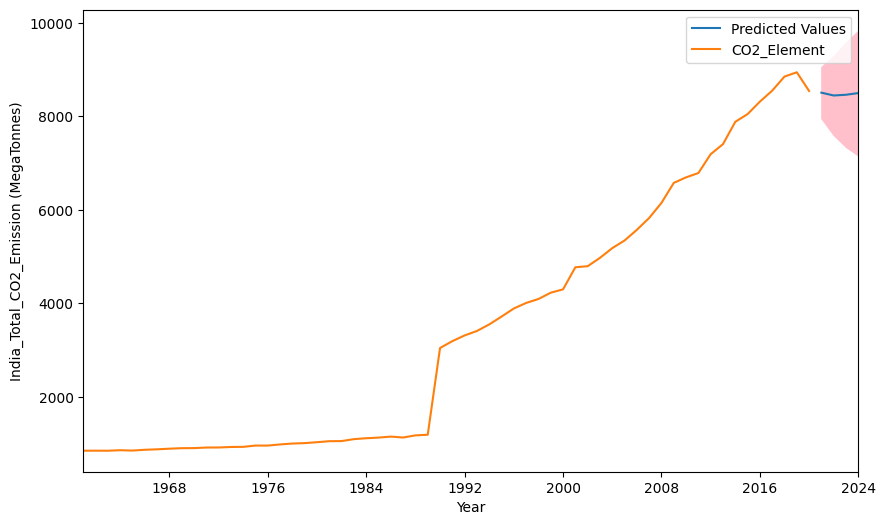

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=4, dynamic=True)

# find the confidence intervals
confidence_intervals = forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower CO2_Element']
upper_limits = confidence_intervals.loc[:,'upper CO2_Element']

# plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

# plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

# Add SI unit and scale to the y-axis
ax.set_ylabel('India_Total_CO2_Emission (MegaTonnes)')

# Set x-axis labels to display years only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.show()

# Prediction of Methane ( CH4 ) Emission using SARIMA Model

In [ ]:
auto_arima(y=emission1['CH4_Element'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -107.290
Date:                Wed, 11 Oct 2023   AIC                            218.579
Time:                        11:22:16   BIC                            222.734
Sample:                    01-01-1970   HQIC                           220.201
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4126      1.152      0.358      0.720      -1.846       2.671
sigma2         2.2234      0.471      4.720      0.000       1.300       3.147
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6954.43
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             7.19
Prob(H) (two-sided):                  0.55   Kurtosis:                        54.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
emission1.index = pd.to_datetime(emission1.index)

#dividing into train and test:
train_data = emission1['CH4_Element'][:'2000']
test_data = emission1['CH4_Element'][:'2005']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          CH4_Element   No. Observations:                   60
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -109.093
Date:                              Wed, 11 Oct 2023   AIC                            228.185
Time:                                      11:22:16   BIC                            238.573
Sample:                                  01-01-1970   HQIC                           232.240
                                       - 01-01-1970                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0653      0.590      0.111      0.912      -1.091       1.222
ma.L2          0.0693      0.383      0.181      0.857      -0.682       0.821
ar.S.L12       0.9986     40.603      0.025      0.980     -78.582      80.580
ma.S.L12      -0.9905    143.134     -0.007      0.994    -281.528     279.547
sigma2         2.3117    236.978      0.010      0.992    -462.157     466.780
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              6764.30
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               7.84   Skew:                             7.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

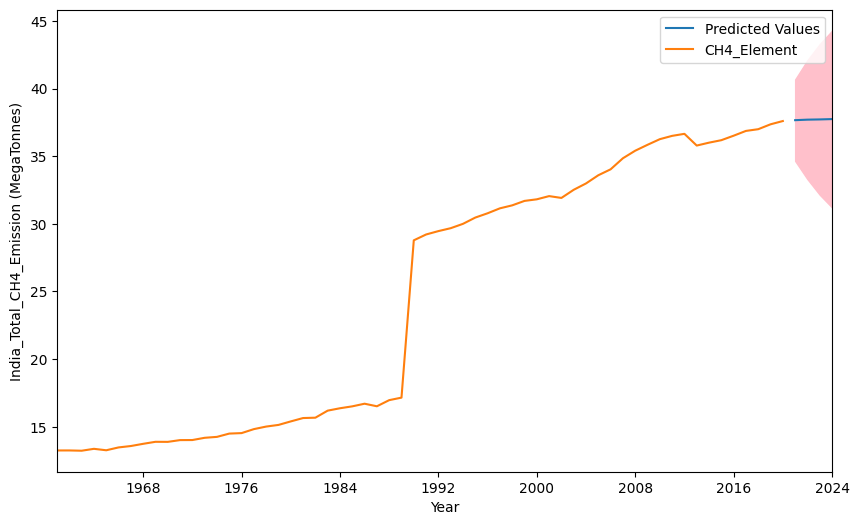

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# predict the next 12 months values to compare with the test dataset
forecasts = results.get_forecast(steps=4, dynamic=True)

# find the confidence intervals
confidence_intervals = forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower CH4_Element']
upper_limits = confidence_intervals.loc[:,'upper CH4_Element']

# plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

# plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

# Add SI unit and scale to the y-axis
ax.set_ylabel('India_Total_CH4_Emission (MegaTonnes)')

# Set x-axis labels to display years only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.show()

# Prediction of Nitrous Oxide (N2O) Emission Using SARIMA Model

In [ ]:
auto_arima(y=emission1['N2O_Element'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 127.916
Date:                              Wed, 11 Oct 2023   AIC                           -249.832
Time:                                      11:22:21   BIC                           -243.599
Sample:                                  01-01-1970   HQIC                          -247.399
                                       - 01-01-1970                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0255      0.003      8.212      0.000       0.019       0.032
ma.S.L12      -0.3304      0.150     -2.207      0.027      -0.624      -0.037
sigma2         0.0007   8.96e-05      8.353      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                93.70
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             1.58
Prob(H) (two-sided):                  0.16   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
emission1.index = pd.to_datetime(emission1.index)

#dividing into train and test:
train_data = emission1['N2O_Element'][:'2000']
test_data = emission1['N2O_Element'][:'2005']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model=SARIMAX(train_data,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results=model.fit()

#printing summry of model reults
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          N2O_Element   No. Observations:                   60
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 123.575
Date:                              Wed, 11 Oct 2023   AIC                           -237.149
Time:                                      11:22:21   BIC                           -226.762
Sample:                                  01-01-1970   HQIC                          -233.094
                                       - 01-01-1970                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1549      0.131      1.187      0.235      -0.101       0.411
ma.L2          0.5347      0.106      5.024      0.000       0.326       0.743
ar.S.L12       0.9984      0.920      1.086      0.278      -0.804       2.801
ma.S.L12      -0.9749      7.232     -0.135      0.893     -15.148      13.199
sigma2         0.0008      0.005      0.159      0.874      -0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.32   Prob(JB):                         0.12
Heteroskedasticity (H):               2.91   Skew:                             0.27
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

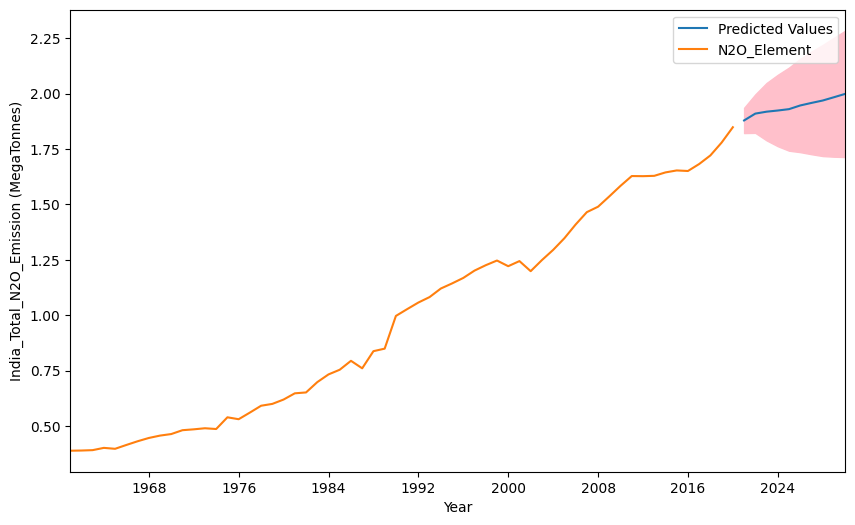

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# predict the next 10 Years values to compare with the test dataset
forecasts = results.get_forecast(steps=10, dynamic=True)

# find the confidence intervals
confidence_intervals = forecasts.conf_int()
lower_limits = confidence_intervals.loc[:,'lower N2O_Element']
upper_limits = confidence_intervals.loc[:,'upper N2O_Element']

# plot the forecasted mean data for the next 12 months and the confidence interval
forecasts.predicted_mean.plot(legend=True, ax=ax, label='Predicted Values')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='pink')

# plotting the actual value from test data
test_data.plot(legend=True, ax=ax)

# Add SI unit and scale to the y-axis
ax.set_ylabel('India_Total_N2O_Emission (MegaTonnes)')

# Set x-axis labels to display years only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.show()

In [ ]:
# Define the Adaptive KNN model
def adaptive_knn(train_data, test_data, k_value):
    predictions = []
    knn = KNeighborsRegressor(n_neighbors=k_value)
    for i in range(len(test_data)):
        train_index = train_data.index.to_julian_date().values.reshape(-1, 1)
        test_index = np.array(test_data.index[i].to_julian_date()).reshape(-1, 1)
        knn.fit(train_index, train_data)
        prediction = knn.predict(test_index)
        predictions.append(prediction[0])
        train_data = train_data.append(test_data[i:i+1])
    return predictions

# Use a single k_value for Adaptive KNN
k_value = 5

# Get the predictions for Adaptive KNN
adaptive_knn_predictions = adaptive_knn(train_data, test_data, k_value)

In [ ]:
import xgboost as xgb

# Define the XGBoost model
def xgboost_model(train_data, test_data):
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_reg.fit(train_data.index.to_julian_date().values.reshape(-1, 1), train_data)
    predictions = xgb_reg.predict(test_data.index.to_julian_date().values.reshape(-1, 1))
    return predictions

# Get the predictions for XGBoost
xgboost_predictions = xgboost_model(train_data, test_data)

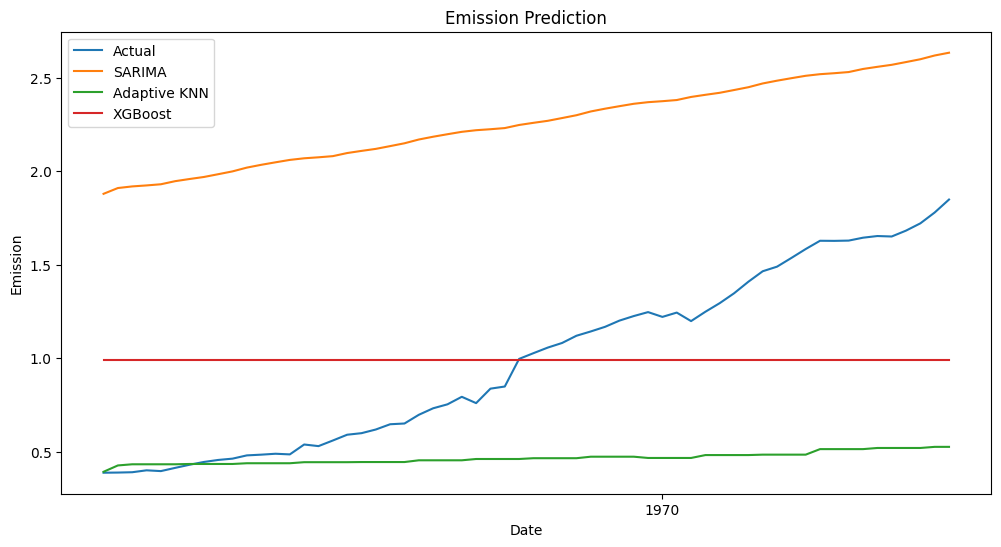

In [ ]:
# Generate SARIMA forecasts for the same number of steps as the test data length
forecasts = results.get_forecast(steps=len(test_data), dynamic=True)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecasts.predicted_mean, label='SARIMA')
plt.plot(test_data.index, adaptive_knn_predictions, label='Adaptive KNN')
plt.plot(test_data.index, xgboost_predictions, label='XGBoost')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.title('Emission Prediction')
plt.legend()
plt.show()